In [215]:
import numpy as np

In [216]:
c_names = [
    "Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel",
    "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore",
    "DriversLicense", "Citizen", "ZipCode", "Income", "ApprovalStatus"
]

In [217]:
import pandas as pd
ds= pd.read_csv('cc_approvals.data', header=None, names=c_names)
ds.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [218]:
print("________________CATEGORICAL Features__________________________")
print("Gender",ds['Gender'].unique())
print("married",ds['Married'].unique())
print("Bankcustomer",ds['BankCustomer'].unique())
print("Edlevel", ds['EducationLevel'].unique())
print("ethnicity", ds['Ethnicity'].unique())
print("Prior-default", ds['PriorDefault'].unique())
print("employed", ds['Employed'].unique())
print("drivers license", ds['DriversLicense'].unique())
print("citizen" ,ds['Citizen'].unique())
print(" approval Status", ds['ApprovalStatus'].unique())
print("Zipcode", ds['ZipCode'].unique())
print("___________________NUMERICAL FEATURES_________________________")
print("Age", ds['Age'].unique())
print("Debt", ds['Debt'].unique())
print("YearsEmployed", ds['YearsEmployed'].unique())
print("CreditScore", ds['CreditScore'].unique())
print("Income", ds['Income'].unique())

________________CATEGORICAL Features__________________________
Gender ['b' 'a' '?']
married ['u' 'y' '?' 'l']
Bankcustomer ['g' 'p' '?' 'gg']
Edlevel ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
ethnicity ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
Prior-default ['t' 'f']
employed ['t' 'f']
drivers license ['f' 't']
citizen ['g' 's' 'p']
 approval Status ['+' '-']
Zipcode ['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500' '00168' '00434' '00583' '00030' '00240' '00070' '00455'
 '00311' '00216' '00491' '00400' '00239' '00160' '00711' '00250' '00520'
 '00515' '00420' '?' '00980' '00443' '00140' '00094' '00368' '00288'
 '00928' '00188' '00112' '00171' '00268' '00167' '00075' '00152' '00176'
 '00329' '00212' '00410' '00274' '00375' '00408' '00350' '00204' '00040'
 '00181' '00399' '00440' '00093' '00060' '00395' '00393' '00021' '00029'
 '00102' '00431' '00370'

we notice that there are "?" referring to missing data in some categorical feature as well as in some numerical features, this missing data should be replaced by other values:


*   if it is numerical by median/mean
*   if categorical by the mode (most common category in the column)



In [219]:
ds.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [220]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


In [221]:
# Replace "?" with NaN in the DataFrame
ds.replace("?", np.nan, inplace=True)

In [222]:
# For each categorical column, fill missing values with the mode
categorical_cols = [
    "Gender", "Married", "BankCustomer", "EducationLevel",
    "Ethnicity", "PriorDefault", "Employed",
    "DriversLicense", "Citizen" ,"ZipCode"
]

for col in categorical_cols:
    # Check if there are missing values in the column
    if ds[col].isna().sum() > 0:
        # Calculate the mode of the column (the most common value)
        most_common = ds[col].mode()[0]
        # Fill missing values with the calculated mode
        ds[col].fillna(most_common, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {most_common}")

Filled missing values in 'Gender' with mode: b
Filled missing values in 'Married' with mode: u
Filled missing values in 'BankCustomer' with mode: g
Filled missing values in 'EducationLevel' with mode: c
Filled missing values in 'Ethnicity' with mode: v
Filled missing values in 'ZipCode' with mode: 00000


<ipython-input-222-c7984a3ca55f>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[col].fillna(most_common, inplace=True)


In [224]:
# Check the number of missing values in each column
print("Missing values in categorical columns after filling:")
print(ds[categorical_cols].isnull().sum())

Missing values in categorical columns after filling:
Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ZipCode           0
dtype: int64


For Numerical missing variables we would check skewness to know whether to replace NaN values with the mean of the column or the median

In [225]:
# List of numerical columns to check skewness for
numerical_cols = [
    "Age", "Debt", "YearsEmployed", "CreditScore", "Income"
]
for col in numerical_cols:
    ds[col] = pd.to_numeric(ds[col], errors='coerce')

# Calculate and print the skewness for each numerical column
print("*****Skewness of numerical features:*******")
for col in numerical_cols:
    skewness_value = ds[col].skew()
    print(f"{col}: {skewness_value}")

*****Skewness of numerical features:*******
Age: 1.1458915555559264
Debt: 1.4888131246649208
YearsEmployed: 2.891330424153805
CreditScore: 5.152519857445985
Income: 13.140655014445459


All values of skewness are higher than ZERO so all Numerical features are skewed to the right and are not normally distributed so we can replace missed values of their columns with the median ( not the mean)

In [226]:
# Fill missing values in the numerical columns
for col in numerical_cols:
    # Check if there are missing values in the column
    if ds[col].isna().sum() > 0:
        # Choose strategy:
        # Since we previously saw these columns are right-skewed (>0), median is appropriate
        value = ds[col].median()
        # Fill missing values with the chosen value
        ds[col].fillna(value, inplace=True)
        print(f"Filled missing values in '{col}' with: {value}")

Filled missing values in 'Age' with: 28.46


<ipython-input-226-b8686a11c3d0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[col].fillna(value, inplace=True)


In [227]:
# Check the number of missing values specifically for the numerical columns
print("Missing values in numerical columns after filling:")
print(ds[numerical_cols].isnull().sum())

Missing values in numerical columns after filling:
Age              0
Debt             0
YearsEmployed    0
CreditScore      0
Income           0
dtype: int64


In [228]:
#  Check the total number of missing values in the entire DataFrame
print("Total missing values in the DataFrame:")
print(ds.isnull().sum().sum())

Total missing values in the DataFrame:
0


### **Data NOW has no missing values**

Turn labels into binary class labels instead of -/+


*   Yes = credit was approved for the customer
*   NO = credit was not approved for the customer

In [229]:
# Replace '+' with 'Yes' and '-' with 'No' in the 'ApprovalStatus' column
ds['ApprovalStatus'].replace({'+': 'Yes', '-': 'No'}, inplace=True)

<ipython-input-229-0de31beb00a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['ApprovalStatus'].replace({'+': 'Yes', '-': 'No'}, inplace=True)


In [230]:
ds.tail(100)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
590,b,30.17,6.500,u,g,cc,v,3.125,t,t,8,f,g,00330,1200,Yes
591,b,27.00,0.750,u,g,c,h,4.250,t,t,3,t,g,00312,150,Yes
592,b,23.17,0.000,u,g,c,v,0.000,f,f,0,f,p,00000,0,Yes
593,b,34.17,5.250,u,g,w,v,0.085,f,f,0,t,g,00290,6,Yes
594,b,38.67,0.210,u,g,k,v,0.085,t,f,0,t,g,00280,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,00260,0,No
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,No
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,00200,1,No
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,00280,750,No


# Encoding Categorical Features

As I am planning to use either Random Forest or Descion tree in this task, both Algorithms do not support numerical inputs so i need to enncode categorical features into numerical representations.

In [231]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
label_cols = [
    "Gender", "Married", "BankCustomer", "EducationLevel", "Ethnicity",
    "PriorDefault", "Employed", "DriversLicense", "Citizen", "ApprovalStatus"
]

# Initialize the LabelEncoder
le = LabelEncoder()

# Iterate through the specified columns and apply Label Encoding
for col in label_cols:
    # Apply fit_transform to encode the column and replace the original
    ds[col] = le.fit_transform(ds[col])

print("Categorical columns encoded using LabelEncoder.")
# checking the unique values of an encoded column to see the result
print(ds['Gender'].unique()) # takes only 2 possible values (a/b)
print(ds['ApprovalStatus'].unique()) # takes only 2 possible values initially (yes/no)
print(ds['Ethnicity'].unique()) # takes 9 different values initially
print(ds['Married'].unique()) # Takes 3 different possible values initially

Categorical columns encoded using LabelEncoder.
[1 0]
[1 0]
[7 3 0 2 4 8 6 1 5]
[1 2 0]


# Split data into test and training sets

In [232]:
from sklearn.model_selection import train_test_split

X = ds.drop("ApprovalStatus", axis=1) # dataset DS without the Label column
y = ds["ApprovalStatus"] # "y" takes the target variable , class labels

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (552, 15)
X_test shape: (138, 15)
y_train shape: (552,)
y_test shape: (138,)



*   X-train is the set of observations to be trained (without including class label column)
*   y-train is the set of label classes to be trained

# Train Classifier


*   RandomForest for Classification



In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
# Train the model using the training data
model.fit(X_train, y_train) # here we train the "data_train = x_train" on its labels y_train.
y_pred = model.predict(X_test) # after training the model  we predict the labels for the testing set : x_test
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
#( here we compare the predicted labels for the testing set x_test which are y_pred and its actual labels in y_test)

Accuracy: 0.8405797101449275
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        68
           1       0.88      0.80      0.84        70

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138



# Model accuracy is 0.84

# Confusion Matrix

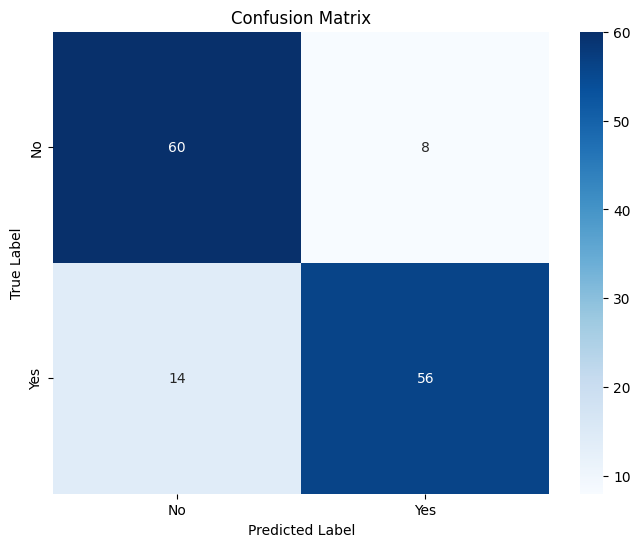

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

class_labels = ['No', 'Yes']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Single Observation Prediction

We want to predict whether a new customer named "Yassmine" will be granted a credit (ApprovalStatus = yes or no?)

In [265]:
new_customer = {
    "Gender": "b",
    "Age": 20,
    "Debt": 0,
    "Married": "t",
    "BankCustomer": "g",
    "EducationLevel": "w",
    "Ethnicity": "v",
    "YearsEmployed": 1.71,
    "PriorDefault": "f",
    "Employed": "t",
    "CreditScore": 0,
    "DriversLicense": "f",
    "Citizen": "s",
    "ZipCode": 120,
    "Income": 5000
}

In [266]:
# List of categorical columns that need encoding
new_label_cols = [
    "Gender", "Married", "BankCustomer", "EducationLevel", "Ethnicity",
    "PriorDefault", "Employed", "DriversLicense", "Citizen" , "ZipCode",
]

In [267]:
new_df = pd.DataFrame([new_customer])

In [268]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols_to_encode_new_data = [col for col in new_label_cols if col in new_df.columns]

for col in cols_to_encode_new_data:
    try:
        # Attempt to transform directly. This works if the value in new_df was in the training data.
        new_df[col] = le.fit_transform(new_df[col])
    except ValueError as e:
        print(f"Could not encode column '{col}': {e}. Ensure the category '{new_df[col].iloc[0]}' was seen during training.")
if not list(new_df.columns) == list(X_train.columns):
    print("Warning: Columns in new_df do not match columns in X_train. Reordering/Aligning...")
    new_df = new_df[X_train.columns] # Reorder columns to match X_train

In [269]:
prediction =model.predict(new_df)
result = "Approved" if prediction[0] == 1 else "Not Approved"
print(f"The customer is {result}.")

The customer is Not Approved.
